In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import seaborn as sns
from IPython.display import display
import matplotlib as plt
import json
import matplotlib.pyplot as plt_pp
import matplotlib.dates as mdates
import pickle



In [2]:
Station_df = pd.read_csv('../raw_data/naiades_export/France_entiere/Stations/StationMesureEauxSurface.csv', sep=',', header=0)
HER_df = pd.read_csv('../raw_data/naiades_export/HER/HER1.csv', sep=',', header=0)


/tmp/ipykernel_17081/2188038165.py:1: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  Station_df = pd.read_csv('../raw_data/naiades_export/France_entiere/Stations/StationMesureEauxSurface.csv', sep=',', header=0)


In [3]:
Station_df.head(10)

,CdStationMesureEauxSurface,LbStationMesureEauxSurface,DateCreationStationMesureEauxSurface,DateMAJInfosStationMesureEauxSurface,StStationMesure,NomStationMesureEauxSurface,FinaliteStationMesureEauxSurface,LocPreciseStationMesureEauxSurface,CarteLocStationMesureEauxSurface,SchemaLocStationMesureEauxSurface,...,ProducteurDuJeu,CoordXStationMesureEauxSurface,CoordYStationMesureEauxSurface,ProjStationMesureEauxSurface,NomEntiteHydrographique,TypeCEStationMesureEauxSurface,TypEthStationMesureEauxSurface,tid,CdIntervenant,DurStationMesureEauxSurface
0,11000013,Ourovéni aval,2008-02-29,NaN,Validé,Ourovéni aval,"2,2",Aval de la rivière Ourovéni,NaN,NaN,...,DEAL Mayotte,513870.0,8584096.0,41,Mro wa Ourovéni,NaN,NaN,14705024,NaN,NaN
1,11000012,M’tsangachéhi aval,2008-02-29,NaN,Validé,M’tsangachéhi aval,"2,2",Aval de la rivière M'tsangachéhi,NaN,NaN,...,DEAL Mayotte,514217.0,8575641.0,41,NaN,NaN,NaN,14705023,NaN,NaN
2,11000014,Ourovéni aval,2008-02-29,NaN,Validé,Ourovéni aval,"2,2",Aval de la rivière Ourovéni,NaN,NaN,...,DEAL Mayotte,512513.0,8584714.0,41,Mro wa Ourovéni,NaN,NaN,14705130,NaN,NaN
3,11000015,Ourovéni intermédiaire,2008-02-29,NaN,Validé,Ourovéni intermédiaire,"2,2",Intermédiaire de la rivière Ourovéni,NaN,NaN,...,DEAL Mayotte,515073.0,8585346.0,41,Mro wa Ourovéni,NaN,NaN,14705025,NaN,NaN
4,11000016,Combani intermédiaire,2008-02-29,NaN,Validé,Combani intermédiaire,"2,2",Intermédiaire de la rivière Combani,NaN,NaN,...,DEAL Mayotte,516088.0,8588138.0,41,Mro wa Ourovéni,NaN,NaN,14705026,NaN,NaN
5,11000017,Longoni aval,2008-02-29,NaN,Validé,Longoni aval,"2,2",Aval de la rivière Longoni,NaN,NaN,...,DEAL Mayotte,517899.0,8591813.0,41,Mro wa Longoni,NaN,NaN,14705027,NaN,NaN
6,11000018,Batrini intermédiaire,2008-02-29,NaN,Validé,Batrini intermédiaire,"2,2",Intermédiaire de la rivière Batrini,NaN,NaN,...,DEAL Mayotte,512127.0,8589390.0,41,NaN,NaN,NaN,14705028,NaN,NaN
7,11000019,Chririni aval,2008-02-29,NaN,Validé,Chririni aval,"2,2",Aval de la rivière Chirini,NaN,NaN,...,DEAL Mayotte,511348.0,8587446.0,41,Mro wa Chirini,NaN,NaN,14705029,NaN,NaN
8,11000020,Gouloué amont,2008-02-29,NaN,Validé,Gouloué amont,"2,2",Amont de la rivière Gouloué,NaN,NaN,...,DEAL Mayotte,520684.0,8585917.0,41,NaN,NaN,NaN,14705030,NaN,NaN
9,11000021,Djalimou aval,2008-02-29,NaN,Validé,Djalimou aval,"2,2",Aval de la rivière Djalimou,NaN,NaN,...,DEAL Mayotte,512401.0,8567948.0,41,Mroni Djialimou,NaN,NaN,14705144,NaN,NaN


In [4]:
print(Station_df.columns)


Index(['CdStationMesureEauxSurface', 'LbStationMesureEauxSurface',
       'DateCreationStationMesureEauxSurface',
       'DateMAJInfosStationMesureEauxSurface', 'StStationMesure',
       'NomStationMesureEauxSurface', 'FinaliteStationMesureEauxSurface',
       'LocPreciseStationMesureEauxSurface',
       'CarteLocStationMesureEauxSurface', 'SchemaLocStationMesureEauxSurface',
       'AltitudePointCaracteritisque', 'SuperficieBassinVersantTopo',
       'SuperficieBassinVersantReel', 'PremierMoisAnneeEtiage',
       'PkPointTronconEntiteHydroPrincipale',
       'DateArretActiviteStationMesureEauxSurface',
       'ComStationMesureEauxSurface',
       'ModeObtentionCoordStationMesureEauxSurface',
       'NatureStationMesureEauxSurface', 'ClasseDurete', 'CdMasseDEau',
       'CdEntiteHydrographique', 'CdTronconHydrographique', 'CdCommune',
       'CdBassin', 'DateDuJeuDeDonnee', 'ProducteurDuJeu',
       'CoordXStationMesureEauxSurface', 'CoordYStationMesureEauxSurface',
       'ProjStation

In [5]:
print(Station_df['CoordYStationMesureEauxSurface'].head(10))



0    8584096.0
1    8575641.0
2    8584714.0
3    8585346.0
4    8588138.0
5    8591813.0
6    8589390.0
7    8587446.0
8    8585917.0
9    8567948.0
Name: CoordYStationMesureEauxSurface, dtype: float64


In [6]:
display(HER_df)


,gid,CdHER1,NomHER1
0,1,16,CORSE
1,2,12,ARMORICAIN
2,3,13,LANDES
3,4,14,COTEAUX AQUITAINS
4,5,1,PYRENEES
5,6,11,CAUSSES AQUITAINS
6,7,21,MASSIF CENTRAL NORD
7,8,2,ALPES INTERNES
8,9,7,PREALPES DU SUD
9,10,20,DEPOTS ARGILO SABLEUX


In [7]:
unique_values = Station_df['LbStationMesureEauxSurface'].unique()
print(unique_values)


['Ourovéni aval' 'M’tsangachéhi aval' 'Ourovéni intermédiaire' ...
 'RUISSEAU DE LANDREVEZEN A DIRINON' "QUIMERC'H A PONT-DE-BUIS"
 'LE RION A LANGUIDIC']


In [8]:
# exemple de coordonnées GPS de station

filtered_df = Station_df[Station_df['LbStationMesureEauxSurface'] == "RUISSEAU DE LANDREVEZEN A DIRINON"]
print(filtered_df[['CoordXStationMesureEauxSurface', 'CoordYStationMesureEauxSurface']])


       CoordXStationMesureEauxSurface  CoordYStationMesureEauxSurface
35413                        160179.0                       6831148.0


#### Test des dataset cleaned enregistrés

In [9]:
Param = ['Nitrates', 'Phosphore total', 'Ammonium']

In [10]:
# On créer une list d'index utilisable pour ledataframe physico chimique (notamment, on selectionne les time series avec minimum 2 points)
def create_index_list(df_param):

    index_list = []

    data_for_df = []
    non_empty_param_time_series = []

    datetime = None
    value = None

    # Iterate over the rows of the DataFrame
    for index in df_param.index:
        value_at_index = df_param.loc[index, 'Value']

        if all(sublist for sublist in value_at_index):
            if len(value_at_index[0])>=2:
                index_list.append(index)
    
    return index_list
    

In [11]:
# Cette cellule met 1min60 environ à run
year = 2020

# Load the df_param_time_series DataFrame
with open(f"../cleaned_data/{year}/df_param_time_series.pkl", 'rb') as file:
    df_param_time_series = pickle.load(file)

# index_key_list_path = f"../cleaned_data/2022/index_key_list.json"

# # Load the list from the JSON file
# with open(index_key_list_path, 'r') as fp:
#     index_key_list = json.load(fp)
    
index_key_list = create_index_list(df_param_time_series)



In [17]:
index_key_test = index_key_list[2]
time = df_param_time_series.loc[index_key_test, 'Value'][1]
param = df_param_time_series.loc[index_key_test, 'Value'][0]

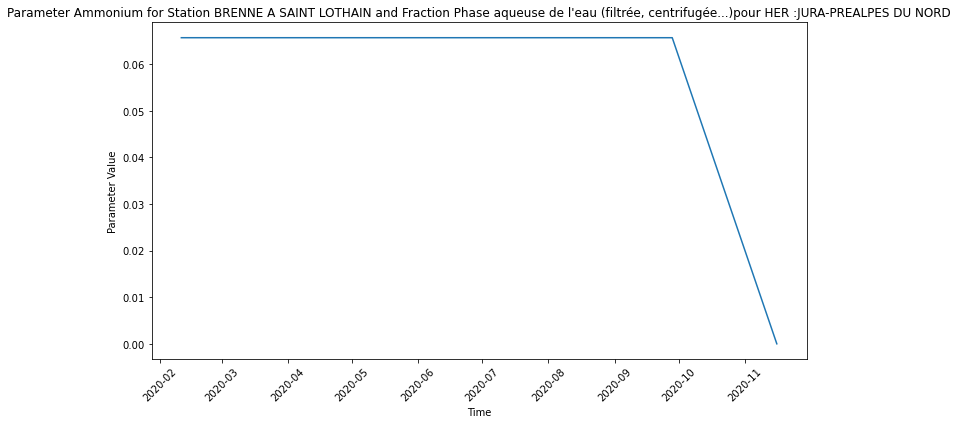

In [18]:


plt_pp.figure(figsize=(10, 6))  
plt_pp.plot(time, param)
plt_pp.xlabel('Time')
plt_pp.ylabel('Parameter Value')
plt_pp.title('Parameter ' + index_key_test[3] + ' for Station ' + index_key_test[1] + ' and Fraction ' + index_key_test[2] + 'pour HER :' + index_key_test[0])

# Rotate date labels
plt_pp.xticks(rotation=45)

# Reduce number of date labels shown
plt_pp.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt_pp.tight_layout()  
plt_pp.show()

In [14]:
print(index_key_test)

('JURA-PREALPES DU NORD', 'BRENNE A SAINT LOTHAIN', 'Eau brute', 'Ammonium')
